In [3]:
import pandas as pd

df = pd.read_csv("/content/NTPC.NS.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-22,165.250000,167.500000,164.850006,167.050003,159.014145,15198091
1,2022-11-23,167.850006,168.250000,166.250000,168.050003,159.966034,12004998
2,2022-11-24,168.699997,170.000000,167.600006,169.500000,161.346283,10986350
3,2022-11-25,170.250000,171.250000,168.600006,169.750000,161.584259,12358833
4,2022-11-28,170.000000,171.899994,169.399994,170.399994,162.202972,5471921
...,...,...,...,...,...,...,...
244,2023-11-16,248.800003,254.250000,247.649994,252.350006,252.350006,22145147
245,2023-11-17,253.000000,253.100006,251.000000,251.600006,251.600006,5618928
246,2023-11-20,251.000000,255.399994,250.300003,251.050003,251.050003,6283832
247,2023-11-21,252.600006,252.800003,247.300003,250.000000,250.000000,6851869


In [4]:
# '''We are going to use only two columns, 'Date', and 'Close'
# They will help us to predict the trend'''

df = df[['Date', 'Close']]

df

,Date,Close
0,2022-11-22,167.050003
1,2022-11-23,168.050003
2,2022-11-24,169.500000
3,2022-11-25,169.750000
4,2022-11-28,170.399994
...,...,...
244,2023-11-16,252.350006
245,2023-11-17,251.600006
246,2023-11-20,251.050003
247,2023-11-21,250.000000


In [ ]:
'''Our data is not right from the point of view of dtypes.
Here, the dtype of Date is object(string). We are going to change the dtypes of the Date column '''
df['Date']

0       2004-11-05
1       2004-11-08
2       2004-11-09
3       2004-11-10
4       2004-11-11
           ...    
4396    2022-08-16
4397    2022-08-17
4398    2022-08-18
4399    2022-08-19
4400    2022-08-22
Name: Date, Length: 4401, dtype: object

In [ ]:
import datetime

'''We are going to create a function that will convert any of the string of the form containing "-"
into a date time function'''


def str_to_datetime(s):
  split = s.split('-')
  #split going to be the list and here '-' will be the seperator
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
  #datetime method of datetime function gives output year, month and day

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df.head()

,Date,Close
0,2004-11-05,62.958332
1,2004-11-08,62.666664
2,2004-11-09,62.750000
3,2004-11-10,62.541664
4,2004-11-11,62.041664


In [ ]:
# '''We want to convert the date-string object into date-time object'''

df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      2004-11-05
1      2004-11-08
2      2004-11-09
3      2004-11-10
4      2004-11-11
          ...    
4396   2022-08-16
4397   2022-08-17
4398   2022-08-18
4399   2022-08-19
4400   2022-08-22
Name: Date, Length: 4401, dtype: datetime64[ns]

In [ ]:
'''df.pop means we take away the column and return it'''

df.index = df.pop('Date')
df
#Date is the index and Close is the only column

,Close
Date,
2004-11-05,62.958332
2004-11-08,62.666664
2004-11-09,62.750000
2004-11-10,62.541664
2004-11-11,62.041664
...,...
2022-08-16,158.750000
2022-08-17,161.449997
2022-08-18,160.800003


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    249 non-null    object 
 1   Close   249 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [7]:
df.describe()

,Close
count,249.000000
mean,193.628916
std,28.436483
min,163.000000
25%,170.500000
50%,177.600006
75%,220.100006
max,253.649994


In [8]:
df.isnull()

,Date,Close
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
244,False,False
245,False,False
246,False,False
247,False,False


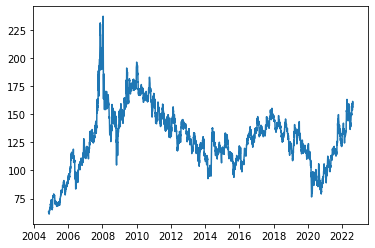

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])
#plt.plot(x, y)

In [ ]:
import numpy as np

'''As we are using LSTM model, we are going to convert the dataframe into a supervised learning problem.'''
'''This will give target_date, the closing value on that date, and the closing values one, two and three days before the target
respectively Target-3, Target-2, Target-1'''
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,109.849998,108.650002,106.000000,103.000000
1,2021-03-26,108.650002,106.000000,103.000000,104.199997
2,2021-03-30,106.000000,103.000000,104.199997,107.699997
3,2021-03-31,103.000000,104.199997,107.699997,106.550003
4,2021-04-01,104.199997,107.699997,106.550003,107.900002
...,...,...,...,...,...
241,2022-03-16,131.949997,132.149994,131.050003,132.750000
242,2022-03-17,132.149994,131.050003,132.750000,132.899994
243,2022-03-21,131.050003,132.750000,132.899994,132.899994
244,2022-03-22,132.750000,132.899994,132.899994,132.850006


In [ ]:
'''We are going to convert them into numpy array so that we can use them directly in model'''


def windowed_df_to_date_X_y(windowed_dataframe):
    # '''Here, X will be the input vector, y will be the output(Target) and date will be the Target date'''
  df_as_np = windowed_dataframe.to_numpy()  #convert to numpy

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1] #To create the X  vector
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
  #we are going to reshape, to reshape we will pass len(dates) as number of observations, second value will be how many columns we have,
  # and last parameter will be number of variable(Close) we actually take.

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)
  #making sure the exact dtpye of X and y

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape
#X.shape = (--, 3, 1); because 3 of columns

((246,), (246, 3, 1), (246,))

##Train, Test and Validation

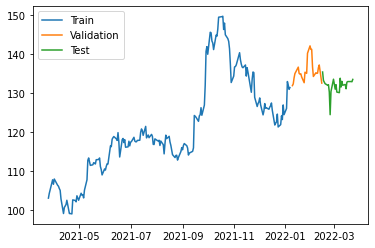

In [ ]:
q_80 = int(len(dates) * .8) #80%
q_90 = int(len(dates) * .9) #90%

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
#training model will take values upto 80%

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
#For validation, we will take the values in between 80% and 90%
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]
#For testing purpose, we will be using rest of the data from 90% onwards



# '''Visualing the train, validation and testing data'''
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

NameError: ignored

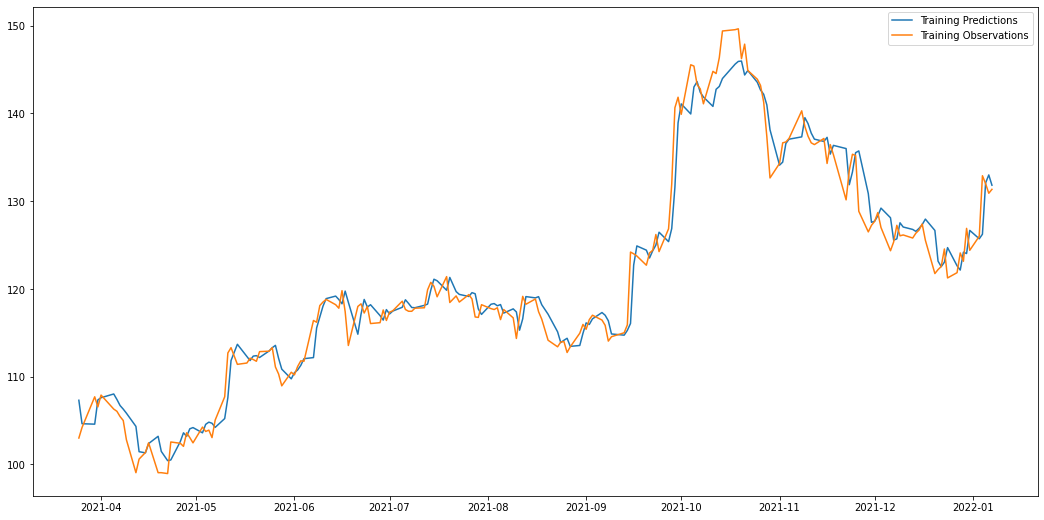

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize = (18, 9))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

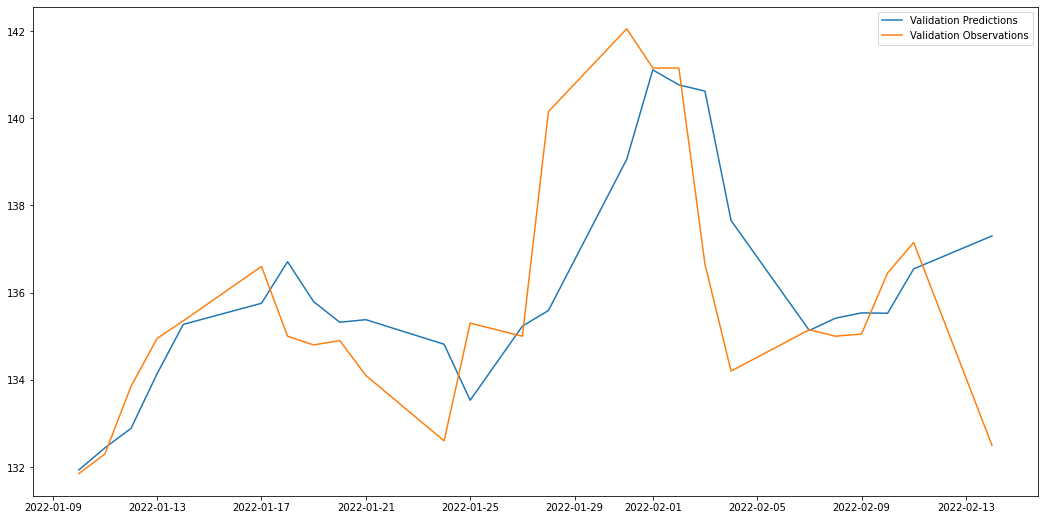

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize = (18, 9))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

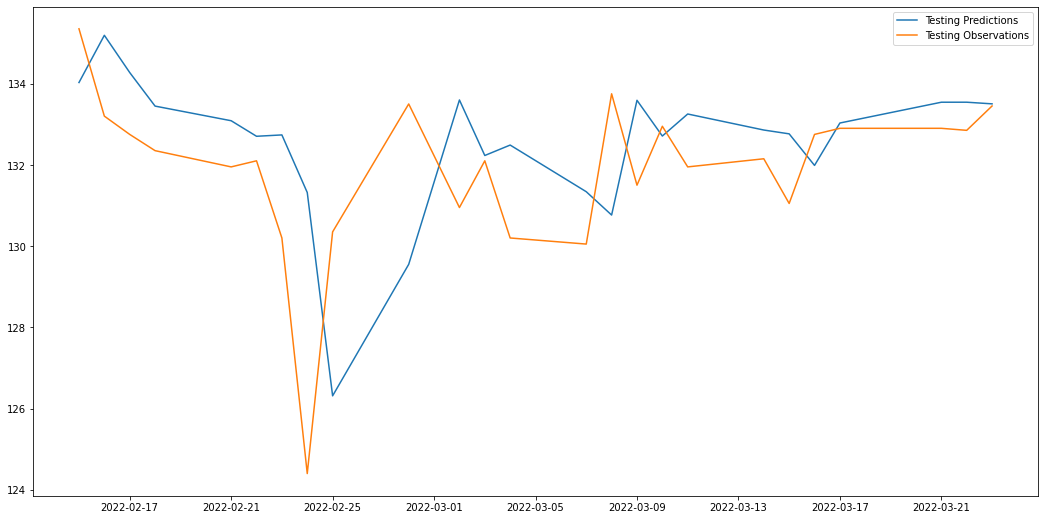

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize = (18, 9))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

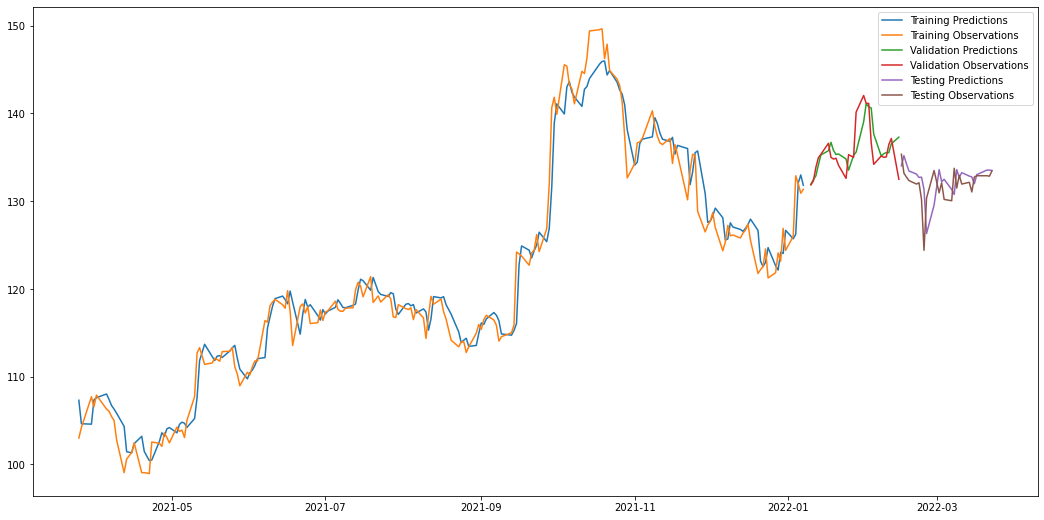

In [ ]:
plt.figure(figsize = (18, 9))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
#we are going to use the data of three days before and make sure to use them to predict the stock price for future.
#We will let the model to recursively predict the stock price.

from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

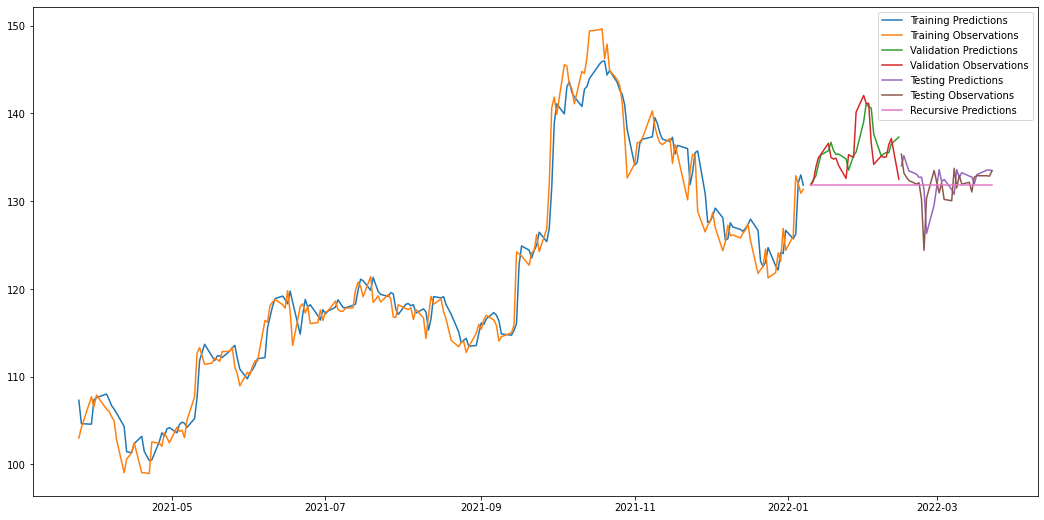

In [ ]:
plt.figure(figsize = (18, 9))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])